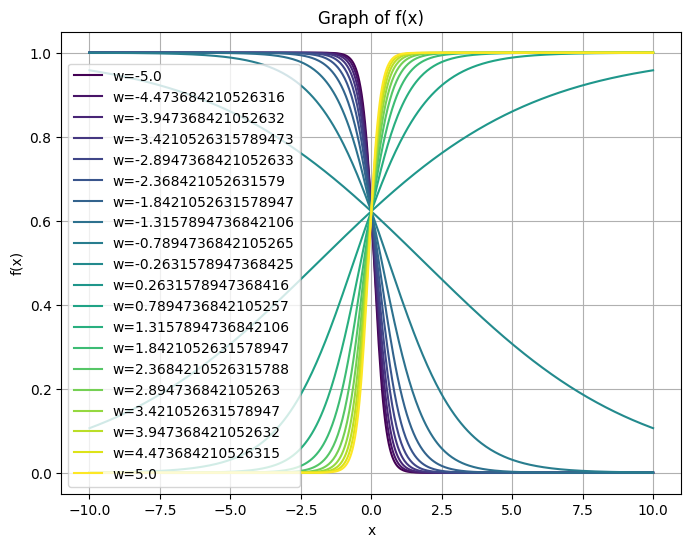

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x,w,b):
    return x*w + b
def activation(x):
    '''
    y = np.zeros_like(x, dtype=int)  # start with all 0s
    mask = x >= 0                 # create boolean mask
    y[mask] = 1
    '''
    return 1 / (1 + np.exp(-x))
    #return y

# Create x values using linspace
x = np.linspace(-10, 10, 500)  # from -10 to 10, with 500 points
w=np.linspace(-5, 5, 20)
b=0.5
colors = plt.cm.viridis(np.linspace(0, 1, len(w)))  # pick colors evenly spaced

# Plot
plt.figure(figsize=(8, 6))
#plt.plot(x, x, label='f(x) = sin(x)', color='blue')
for wi, c in zip(w,colors):
    y = activation(f(x,wi,b))
    plt.plot(x, y, label=f'w={wi}', color=c)
plt.title("Graph of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import numpy as np

class BasicNeuron:
    def __init__(self, num_inputs, activation_function):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand(1)
        self.activation_function = activation_function

    def forward(self, inputs):
        inputs = np.asarray(inputs).reshape(-1)
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activation_function(weighted_sum)
        return output

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a neuron with 3 inputs and sigmoid activation
neuron = BasicNeuron(3, sigmoid)

# Example inputs
inputs = np.array((0.6, 0.2, 0.9))

# Get neuron output
output = neuron.forward(inputs)
print("Neuron Output:", output)


Neuron Output: [0.91812941]


In [21]:
def step_function(x):
  return 1 if x >= 0 else 0

class Perceptron:
  def __init__(self, num_inputs, learning_rate=0.01):
    self.neuron = BasicNeuron(num_inputs, step_function)
    self.learning_rate = learning_rate

  def predict(self, inputs):
    return self.neuron.forward(inputs)

  def train(self, training_inputs, labels, epochs=10):
    for epoch in range(epochs):
      l=[]
      ziped = zip(training_inputs, labels)
      # zip them together
      zipped = list(zip(training_inputs, labels))

      # shuffle in-place
      np.random.shuffle(zipped)
      for inputs, label in ziped:
        prediction = self.predict(inputs)
        error = label - prediction
        l.append(error)
        # Perceptron learning rule update
        self.neuron.weights += self.learning_rate * error * inputs
        self.neuron.bias += self.learning_rate * error
      #print('error',sum(l)/len(l))

        # McCulloch and Pits
        # Rosenblatts perceptron

In [35]:
x = np.array([(0,0),(1,1),(0,1),(1,0)])
y=[]
for x1,x2 in x:
    y.append(int((x1 and x2) or (not x1 and not x2)))
y = np.array(y)
perceptron = Perceptron(2,0.1)

perceptron.train(x,y,epochs=10000)
print(perceptron.neuron.weights)
print(perceptron.neuron.bias)
for i,val in enumerate(x):
    print('input ',val,', predicted :- ',perceptron.predict(val),"correct :-", y[i])

[-0.07586677 -0.14539403]
[-0.07560496]
input  [0 0] , predicted :-  0 correct :- 1
input  [1 1] , predicted :-  0 correct :- 1
input  [0 1] , predicted :-  0 correct :- 0
input  [1 0] , predicted :-  0 correct :- 0
